
# Sobol function

The Sobol function is non-linear function that is commonly used to benchmark uncertainty 
and senstivity analysis methods. Unlike the Ishigami function which has 3 input 
variables, the Sobol function can have any number of input variables. 

\begin{align}g(x_1, x_2, \ldots, x_D) := \prod_{i=1}^{D} \frac{|4x_i - 2| + a_i}{1 + a_i},\end{align}

where,

\begin{align}x_i \sim \mathcal{U}(0, 1), \quad a_i \in \mathbb{R}.\end{align}

This is an example from [1]_, where first order, total order and additionally the second
order indices are computed.

.. [1] Glen, G., & Isaacs, K. (2012). Estimating Sobol sensitivity indices using correlations. Environmental Modelling and Software, 37, 157–166.


In [1]:
import numpy as np

from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel
from UQpy.distributions import Uniform
from UQpy.distributions.collection.JointIndependent import JointIndependent
from UQpy.sensitivity.SobolSensitivity import SobolSensitivity
from UQpy.sensitivity.PostProcess import *

np.random.seed(123)

**Define the model and input distributions**



In [2]:
# Create Model object
num_vars = 6
a_vals = np.array([0.0, 0.5, 3.0, 9.0, 99.0, 99.0])

model = PythonModel(
    model_script="local_sobol_func.py",
    model_object_name="evaluate",
    var_names=["X_" + str(i) for i in range(num_vars)],
    delete_files=True,
    a_values=a_vals,
)

runmodel_obj = RunModel(model=model)

# Define distribution object
dist_object = JointIndependent([Uniform(0, 1)] * num_vars)

**Compute Sobol indices**



In [3]:
SA = SobolSensitivity(runmodel_obj, dist_object)

# Compute Sobol indices using the pick and freeze algorithm
SA.run(n_samples=50_000, estimate_second_order=True)

**First order Sobol indices**

Expected first order Sobol indices:

$S_1$ = 5.86781190e-01

$S_2$ = 2.60791640e-01

$S_3$ = 3.66738244e-02

$S_4$ = 5.86781190e-03

$S_5$ = 5.86781190e-05

$S_6$ = 5.86781190e-05



In [4]:
SA.first_order_indices

array([[ 0.59156982],
       [ 0.25704182],
       [ 0.03463283],
       [ 0.00428303],
       [-0.00163227],
       [-0.00172201]])

**Plot the first order sensitivity indices**



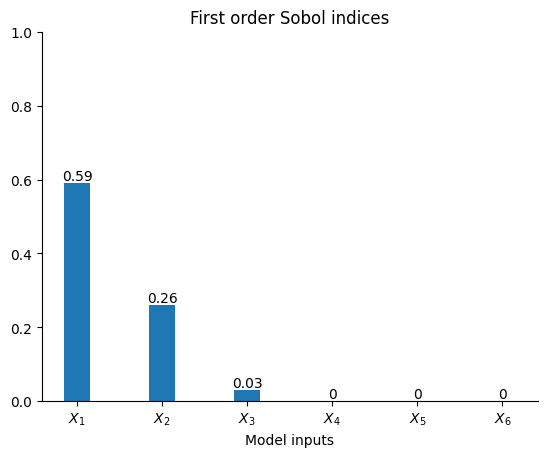

In [5]:
fig1, ax1 = plot_sensitivity_index(
    SA.first_order_indices[:, 0],
    plot_title="First order Sobol indices",
    color="C0",
)

**Total order Sobol indices**

Expected total order Sobol indices:

$S_{T_1}$ = 6.90085892e-01

$S_{T_2}$ = 3.56173364e-01

$S_{T_3}$ = 5.63335422e-02

$S_{T_4}$ = 9.17057664e-03

$S_{T_5}$ = 9.20083854e-05

$S_{T_6}$ = 9.20083854e-05




In [6]:
SA.total_order_indices

array([[ 0.70274742],
       [ 0.34858979],
       [ 0.04765383],
       [ 0.00493324],
       [-0.00294848],
       [-0.00278335]])

**Plot the first and total order sensitivity indices**



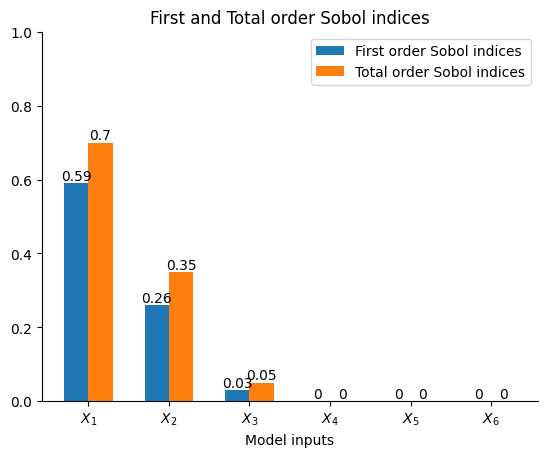

In [7]:
fig2, ax2 = plot_index_comparison(
    SA.first_order_indices[:, 0],
    SA.total_order_indices[:, 0],
    label_1="First order Sobol indices",
    label_2="Total order Sobol indices",
    plot_title="First and Total order Sobol indices",
)

**Second order Sobol indices**

Expected second order Sobol indices:

$S_{T_{12}}$ = 0.0869305

$S_{T_{13}}$ = 0.0122246

$S_{T_{14}}$ = 0.00195594

$S_{T_{15}}$ = 0.00001956

$S_{T_{16}}$ = 0.00001956

$S_{T_{23}}$ = 0.00543316

$S_{T_{24}}$ = 0.00086931

$S_{T_{25}}$ = 0.00000869

$S_{T_{26}}$ = 0.00000869

$S_{T_{34}}$ = 0.00012225

$S_{T_{35}}$ = 0.00000122

$S_{T_{36}}$ = 0.00000122

$S_{T_{45}}$ = 0.00000020

$S_{T_{46}}$ = 0.00000020

$S_{T_{56}}$ = 2.0e-9



In [8]:
SA.second_order_indices

array([[0.08753676],
       [0.01418221],
       [0.00469685],
       [0.00212812],
       [0.00210026],
       [0.0092095 ],
       [0.00288718],
       [0.00281717],
       [0.00284461],
       [0.00344057],
       [0.00322214],
       [0.00337774],
       [0.0033078 ],
       [0.00341475],
       [0.00347133]])

**Plot the second order sensitivity indices**



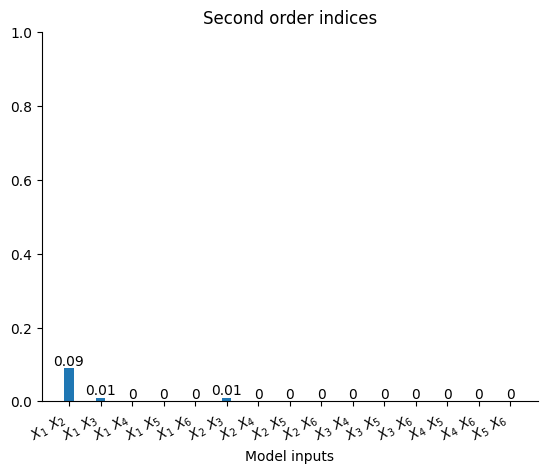

In [9]:
fig3, ax3 = plot_second_order_indices(
    SA.second_order_indices[:, 0],
    num_vars=num_vars,
)